# **Tugas Kelompok Pembelajaran Mesin - Klasifikasi Data Teks**

Nama Anggota Kelompok:
1. Rusyda Tsaniya Eka Putri (22/511227/NPA/19855)
2. Dicky Setiawan (22/511229/NPA/19857)


Buatlah mini riset terkait klasifikasi data teks menggunakan machine learning, seperti task sentiment analysis, news topic classifiation, spam detection, dll. Mini riset ini dapat menggunakan dataset public atau dataset yang diakuisisi sendiri. Mini riset ini diharapkan dapat menyelesaikan suatu permasalahan real life tertentu. 


Buatlah laporan dan presentasi yang menjelaskan beberapa poin penting sebagai berikut: 

1. Judul Mini Riset.
2. Pendahuluan yang meliputi paling tidak: latar belakang, rumusan masalah, batasan, tujuan, dan manfaat.
3. Solusi usulan yang meliputi gambaran umum solusi, dataset yang digunakan, metode yang akan digunakan,  metrik evaluasi yang digunakan.
4. Hasil dan Pembahasan atas eksperimen/pengujian yang dilakukan (lebih baik apabila hasil dapat di-deploy atau dibuat visualisasinya)
5. Kesimpulan.

Kumpulkan dataset dan source code dalam satu google drive kemudian submit link google drive tersebut.

Link Dataset: https://www.kaggle.com/datasets/atulanandjha/imdb-50k-movie-reviews-test-your-bert?select=train.csv 

## **Data Load & Preparation**

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Menghubungkan Google Drive dan Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Mengambil dataset
dataset = '/content/gdrive/MyDrive/archive (4)/train.csv'
df_train = pd.read_csv(dataset, header=None)

In [ ]:
# Mengganti nama column/atribut
col_names = ['review', 'sentiment']
df_train.columns = col_names
col_names

['review', 'sentiment']

In [ ]:
# Menampilkan Keseluruhan Dataset
df_train

,review,sentiment
0,text,sentiment
1,"Now, I won't deny that when I purchased this o...",neg
2,"The saddest thing about this ""tribute"" is that...",neg
3,Last night I decided to watch the prequel or s...,neg
4,I have to admit that i liked the first half of...,neg
...,...,...
24996,"This film is fun, if your a person who likes a...",pos
24997,After seeing this film I feel like I know just...,pos
24998,first this deserves about 5 stars due to actin...,neg
24999,If you like films that ramble with little plot...,neg


In [ ]:
# Menampilkan isi dataset teratas
df_train.head(10)

,review,sentiment
0,text,sentiment
1,"Now, I won't deny that when I purchased this o...",neg
2,"The saddest thing about this ""tribute"" is that...",neg
3,Last night I decided to watch the prequel or s...,neg
4,I have to admit that i liked the first half of...,neg
5,I was not impressed about this film especially...,neg
6,"The original movie, The Odd Couple, has some w...",pos
7,"This was a great movie with a good cast, all o...",pos
8,"I'm a sucker for a good romance, but this one ...",neg
9,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25001 non-null  object
 1   sentiment  25001 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [ ]:
# Mengecek apakah terdapat missing value
df_train.isnull().sum()

review       0
sentiment    0
dtype: int64

### **Dataset**

In [ ]:
sentiment_counts = df_train['sentiment'].value_counts()

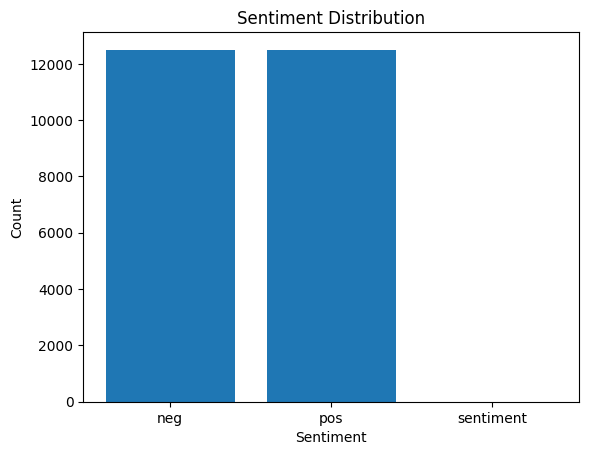

In [ ]:
# Plot histogram
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

## **Exploratory Data Analysis (EDA)**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Character counts
df_train["char_count"] = df_train["review"].map(lambda x: len(x))
# Word counts
df_train["word_count"] = df_train["review"].map(lambda x: len(x.split()))
# Sentence counts
df_train["sent_count"] = df_train["review"].map(lambda x: len(sent_tokenize(x)))
# String counts
df_train["hashtag_count"] = df_train["review"].map(lambda x: x.count("#"))
# Average word length
df_train["avg_word_len"] = df_train["review"].map(lambda x: np.mean([len(w) for w in str(x).split()]))
# Average sentence length
df_train["avg_sent_len"] = df_train["review"].map(lambda x: np.mean([len(w.split()) for w in sent_tokenize(x)]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_train

,review,sentiment,char_count,word_count,sent_count,hashtag_count,avg_word_len,avg_sent_len
0,text,sentiment,4,1,1,0,4.000000,1.000000
1,"Now, I won't deny that when I purchased this o...",neg,719,137,8,0,4.255474,17.125000
2,"The saddest thing about this ""tribute"" is that...",neg,1857,313,7,0,4.936102,44.714286
3,Last night I decided to watch the prequel or s...,neg,945,180,6,2,4.255556,30.333333
4,I have to admit that i liked the first half of...,neg,913,162,13,0,4.641975,12.538462
...,...,...,...,...,...,...,...,...
24996,"This film is fun, if your a person who likes a...",pos,245,49,2,0,4.020408,24.500000
24997,After seeing this film I feel like I know just...,pos,780,143,7,0,4.461538,20.428571
24998,first this deserves about 5 stars due to actin...,neg,4973,835,20,0,4.956886,41.900000
24999,If you like films that ramble with little plot...,neg,1134,200,12,0,4.675000,16.750000


### **Histogram Plots**

In [ ]:
# get derived features names
derived_features = df_train.columns[2:]
derived_features

Index(['char_count', 'word_count', 'sent_count', 'hashtag_count',
       'avg_word_len', 'avg_sent_len'],
      dtype='object')

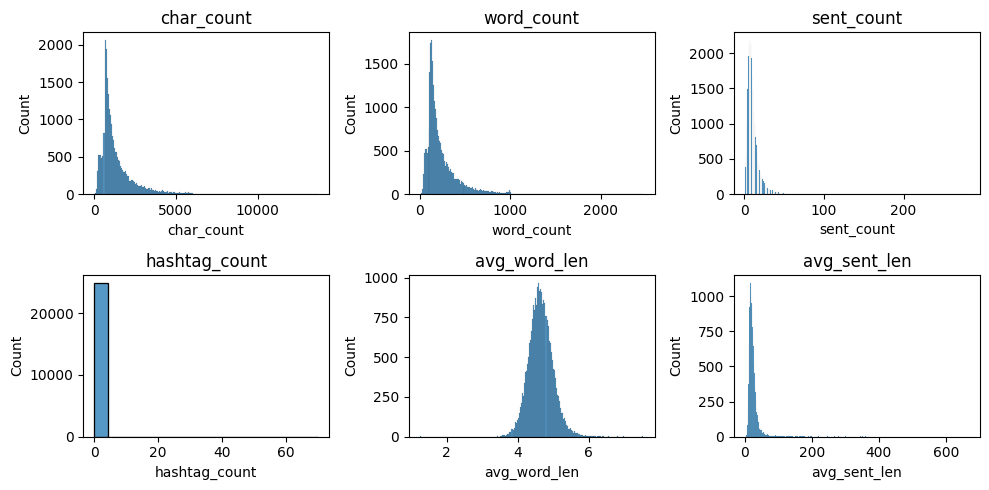

In [ ]:
# create histogram for each derived feature
plt.figure(figsize=(10, 5))
for i in range(len(derived_features)):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_train[derived_features[i]])
    plt.title(derived_features[i])
plt.tight_layout()
plt.show()

### **Term Frequency (TF)**

In [ ]:
import re
import string
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # Remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    
    return text
df_train["text_clean"] = df_train["review"].map(lambda x: clean_text(x))

In [ ]:
df_train[["review", "text_clean"]].head()

,review,text_clean
0,text,text
1,"Now, I won't deny that when I purchased this o...",now i wont deny that when i purchased this off...
2,"The saddest thing about this ""tribute"" is that...",the saddest thing about this tribute is that a...
3,Last night I decided to watch the prequel or s...,last night i decided to watch the prequel or s...
4,I have to admit that i liked the first half of...,i have to admit that i liked the first half of...


### **Kata yang Sering Muncul**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")

corpus = [word for i in df_train["text_clean"].str.split().values.tolist() for word in i if (word not in stop_words)]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(corpus[:10])

['text', 'wont', 'deny', 'purchased', 'ebay', 'high', 'expectations', 'incredible', 'outofprint', 'work']


In [ ]:
from nltk.probability import FreqDist
most_common = FreqDist(corpus).most_common(20)
most_common

[('br', 57158),
 ('movie', 41813),
 ('film', 37461),
 ('one', 25511),
 ('like', 19645),
 ('good', 14555),
 ('even', 12506),
 ('would', 12135),
 ('time', 11783),
 ('really', 11663),
 ('story', 11455),
 ('see', 11223),
 ('much', 9586),
 ('well', 9378),
 ('get', 9212),
 ('also', 9073),
 ('people', 8952),
 ('bad', 8915),
 ('great', 8894),
 ('first', 8859)]

<Axes: >

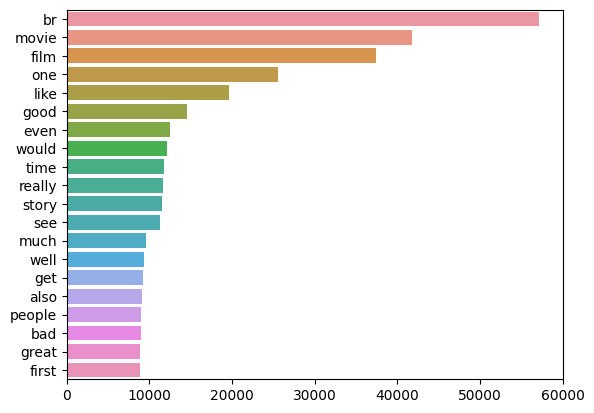

In [ ]:
words, frequency = [], []
for word, freq in most_common:
    words.append(word)
    frequency.append(freq)

sns.barplot(x=frequency, y=words)

## **Text Preprocessing**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/archive (4)/train.csv')
df.head(10)

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg
5,"The original movie, The Odd Couple, has some w...",pos
6,"This was a great movie with a good cast, all o...",pos
7,"I'm a sucker for a good romance, but this one ...",neg
8,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos
9,"The proverb ""Never judge a book by it's cover""...",neg


### **Text Cleaning**

In [ ]:
import string
import re

def clean_text(text):
   # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub("[%s]" % re.escape(string.punctuation), "", text)
    # Remove non-Roman characters
    text = re.sub("([^\x00-\x7F])+", " ", text)
    return text

df['cleaned_review'] = df['text'].apply(lambda x: clean_text(x))
df.head(10)

,text,sentiment,cleaned_review
0,"Now, I won't deny that when I purchased this o...",neg,now i wont deny that when i purchased this off...
1,"The saddest thing about this ""tribute"" is that...",neg,the saddest thing about this tribute is that a...
2,Last night I decided to watch the prequel or s...,neg,last night i decided to watch the prequel or s...
3,I have to admit that i liked the first half of...,neg,i have to admit that i liked the first half of...
4,I was not impressed about this film especially...,neg,i was not impressed about this film especially...
5,"The original movie, The Odd Couple, has some w...",pos,the original movie the odd couple has some won...
6,"This was a great movie with a good cast, all o...",pos,this was a great movie with a good cast all of...
7,"I'm a sucker for a good romance, but this one ...",neg,im a sucker for a good romance but this one do...
8,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos,fastpaced funny sexy and spectacular cagney is...
9,"The proverb ""Never judge a book by it's cover""...",neg,the proverb never judge a book by its cover wa...


In [ ]:
from wordcloud import WordCloud

In [ ]:
data_pos = df[df["sentiment"]== 'pos']["cleaned_review"]
data_neg = df[df["sentiment"]== 'neg']["cleaned_review"]

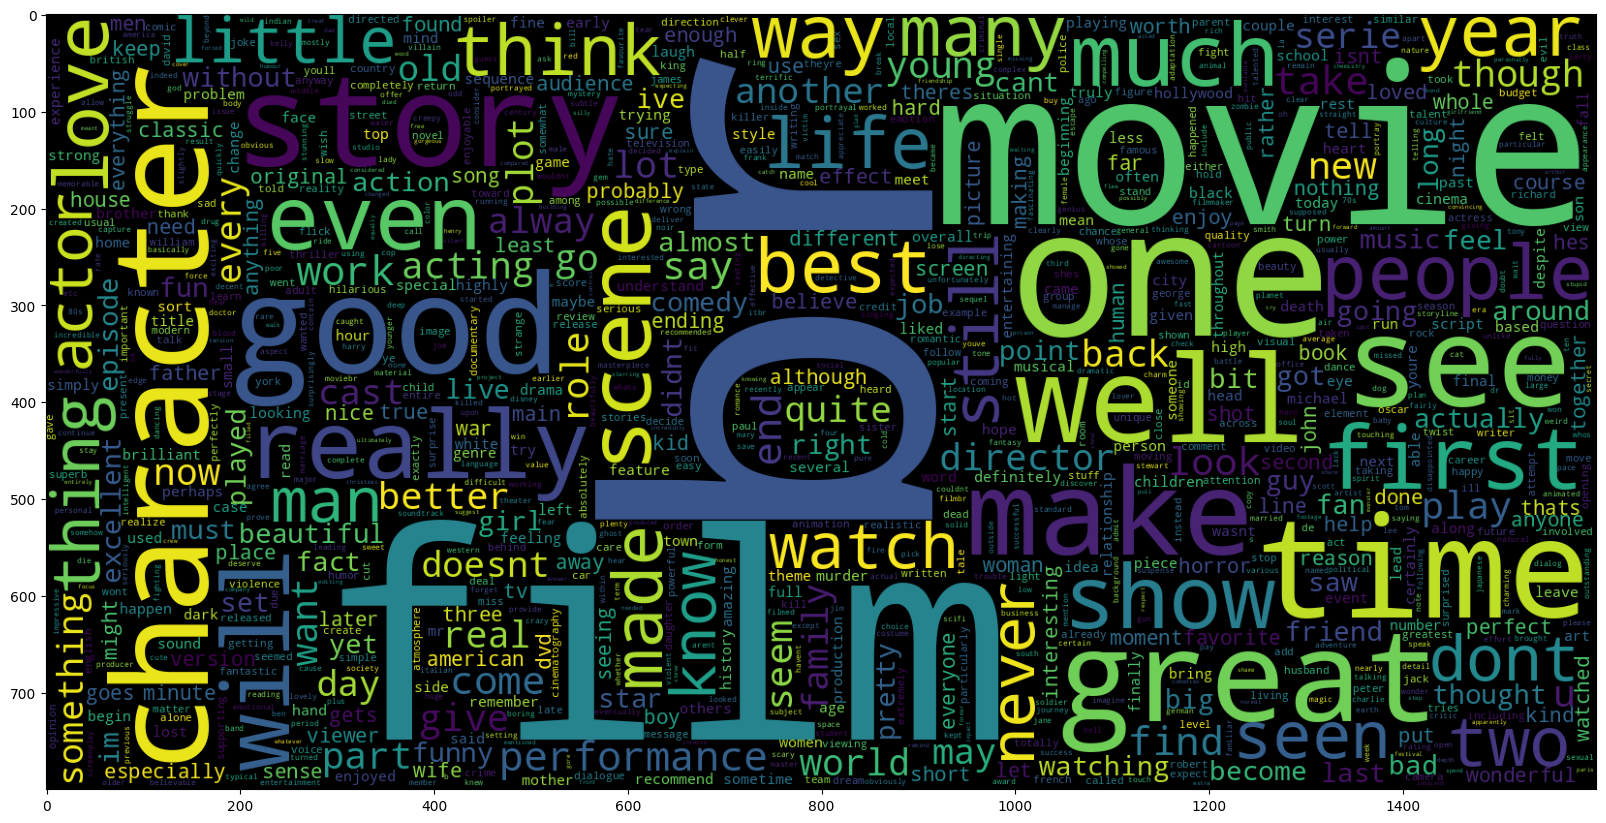

In [ ]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

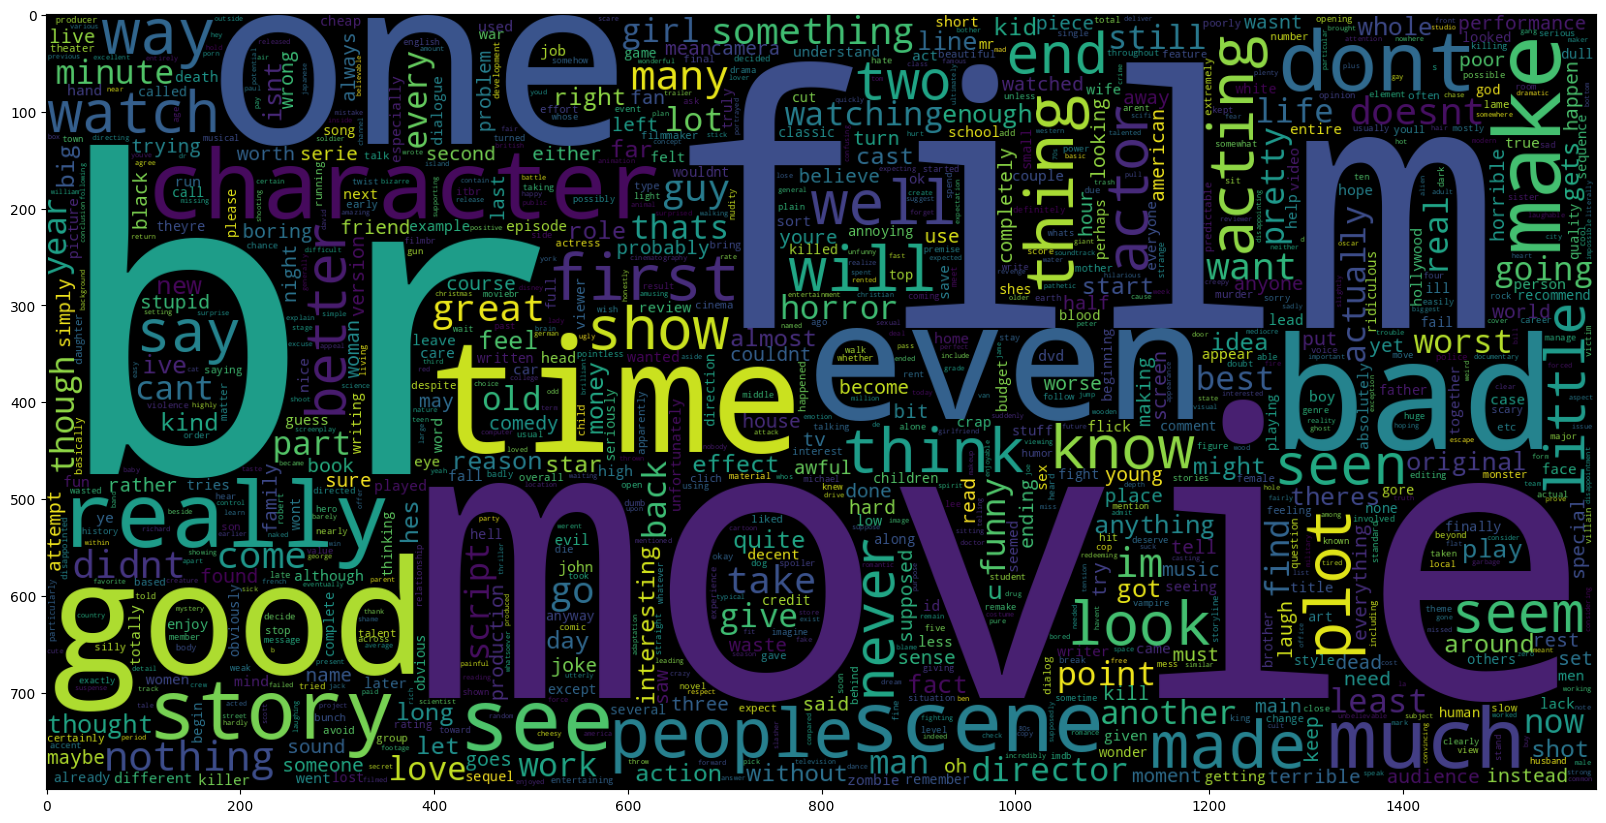

In [ ]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.figure(figsize = (20,20))
plt.imshow(wc)

### **Tokenisasi**

In [ ]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text

df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_text(x))
df.head(10)

,text,sentiment,cleaned_review,tokens
0,"Now, I won't deny that when I purchased this o...",neg,now i wont deny that when i purchased this off...,"[now, i, wont, deny, that, when, i, purchased,..."
1,"The saddest thing about this ""tribute"" is that...",neg,the saddest thing about this tribute is that a...,"[the, saddest, thing, about, this, tribute, is..."
2,Last night I decided to watch the prequel or s...,neg,last night i decided to watch the prequel or s...,"[last, night, i, decided, to, watch, the, preq..."
3,I have to admit that i liked the first half of...,neg,i have to admit that i liked the first half of...,"[i, have, to, admit, that, i, liked, the, firs..."
4,I was not impressed about this film especially...,neg,i was not impressed about this film especially...,"[i, was, not, impressed, about, this, film, es..."
5,"The original movie, The Odd Couple, has some w...",pos,the original movie the odd couple has some won...,"[the, original, movie, the, odd, couple, has, ..."
6,"This was a great movie with a good cast, all o...",pos,this was a great movie with a good cast all of...,"[this, was, a, great, movie, with, a, good, ca..."
7,"I'm a sucker for a good romance, but this one ...",neg,im a sucker for a good romance but this one do...,"[im, a, sucker, for, a, good, romance, but, th..."
8,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos,fastpaced funny sexy and spectacular cagney is...,"[fastpaced, funny, sexy, and, spectacular, cag..."
9,"The proverb ""Never judge a book by it's cover""...",neg,the proverb never judge a book by its cover wa...,"[the, proverb, never, judge, a, book, by, its,..."


### **Lematisasi dan Menghapus Stopwords**

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')


lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,sentiment,cleaned_review,tokens,lemmatized_review
0,"Now, I won't deny that when I purchased this o...",neg,now i wont deny that when i purchased this off...,"[now, i, wont, deny, that, when, i, purchased,...",wont deny purchased ebay high expectation incr...
1,"The saddest thing about this ""tribute"" is that...",neg,the saddest thing about this tribute is that a...,"[the, saddest, thing, about, this, tribute, is...",saddest thing tribute almost singer including ...
2,Last night I decided to watch the prequel or s...,neg,last night i decided to watch the prequel or s...,"[last, night, i, decided, to, watch, the, preq...",last night decided watch prequel shall say cal...
3,I have to admit that i liked the first half of...,neg,i have to admit that i liked the first half of...,"[i, have, to, admit, that, i, liked, the, firs...",admit liked first half sleeper looked good act...
4,I was not impressed about this film especially...,neg,i was not impressed about this film especially...,"[i, was, not, impressed, about, this, film, es...",not impressed film especially fact went cinema...
5,"The original movie, The Odd Couple, has some w...",pos,the original movie the odd couple has some won...,"[the, original, movie, the, odd, couple, has, ...",original movie odd couple wonderful comic onel...
6,"This was a great movie with a good cast, all o...",pos,this was a great movie with a good cast all of...,"[this, was, a, great, movie, with, a, good, ca...",great movie good cast hitting cylinder dianne ...
7,"I'm a sucker for a good romance, but this one ...",neg,im a sucker for a good romance but this one do...,"[im, a, sucker, for, a, good, romance, but, th...",im sucker good romance one doesnt qualify eith...
8,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos,fastpaced funny sexy and spectacular cagney is...,"[fastpaced, funny, sexy, and, spectacular, cag...",fastpaced funny sexy spectacular cagney always...
9,"The proverb ""Never judge a book by it's cover""...",neg,the proverb never judge a book by its cover wa...,"[the, proverb, never, judge, a, book, by, its,...",proverb never judge book cover coined warning ...


## **Modelling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [ ]:
X = df['lemmatized_review']

vectorizer = TfidfVectorizer(max_features=100)

# Compute TF-IDF values
tfidf_matrix = vectorizer.fit_transform(X)

tfidf_array = tfidf_matrix.toarray()

print(tfidf_matrix)

feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print(feature_names)

y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  (0, 54)	0.22781822705017823
  (0, 20)	0.23798061595477743
  (0, 49)	0.2106041690025626
  (0, 23)	0.2680129980655769
  (0, 34)	0.24971958355473878
  (0, 57)	0.15253836701501924
  (0, 15)	0.2455775160488677
  (0, 30)	0.3118078557676217
  (0, 37)	0.6239477316386596
  (0, 90)	0.253316466474063
  (0, 95)	0.28042595383935265
  (1, 47)	0.17260710871108945
  (1, 22)	0.13406698643467946
  (1, 21)	0.16736932644760447
  (1, 17)	0.19025718324718158
  (1, 7)	0.1580282821022702
  (1, 5)	0.20112879115375112
  (1, 92)	0.15230871812193042
  (1, 70)	0.28015544396632436
  (1, 77)	0.3458315157283551
  (1, 43)	0.1128175766845482
  (1, 12)	0.1956826684319735
  (1, 19)	0.1871959120146719
  (1, 31)	0.134837543418838
  (1, 58)	0.38384056789013044
  :	:
  (24997, 49)	0.04657770763591368
  (24997, 57)	0.33735739875115267
  (24997, 15)	0.05431249437583013
  (24997, 95)	0.06201965589433636
  (24998, 62)	0.2687826975948999
  (24998, 42)	0.4386568576100932
  (24998, 78)	0.15969770763157567
  (24998, 69)	0.32977231

### **Logistic Regression**

In [ ]:
lr_model = Pipeline([('tfidf', TfidfVectorizer(lowercase=False)), ('clf', LogisticRegression(solver='lbfgs'))])

lr_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('clf', LogisticRegression())])

In [ ]:
predictions = lr_model.predict(X_test)
report = classification_report(y_test, predictions, output_dict=True)

df_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("blue", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.890000,0.870000,0.880000,4132.000000
pos,0.870000,0.900000,0.880000,4118.000000
accuracy,0.880000,0.880000,0.880000,0.880000
macro avg,0.880000,0.880000,0.880000,8250.000000
weighted avg,0.880000,0.880000,0.880000,8250.000000


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

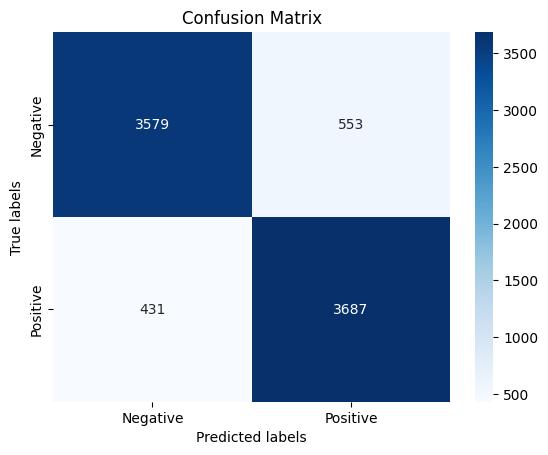

In [ ]:
# Visualizing Confusion Matrix 
import matplotlib.pyplot as plt
ax= plt.subplot()
cm= confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

### **Linear Support Vector Classifier (SVC)**

In [ ]:
svc_model = Pipeline([('tfidf', TfidfVectorizer(lowercase=False)), ('classifier', LinearSVC())])
svc_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(lowercase=False)),
                ('classifier', LinearSVC())])

In [ ]:
#Visualizing Classification Report 
predictions= svc_model.predict(X_test)
report = classification_report(y_test,predictions, output_dict=True)

df_report = pd.DataFrame(report).transpose().round(2)

#df_report.style.background_gradient(cmap='greens').set_precision(2)
cm = sns.light_palette("red", as_cmap=True)
df_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
neg,0.890000,0.870000,0.880000,4132.000000
pos,0.870000,0.890000,0.880000,4118.000000
accuracy,0.880000,0.880000,0.880000,0.880000
macro avg,0.880000,0.880000,0.880000,8250.000000
weighted avg,0.880000,0.880000,0.880000,8250.000000


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

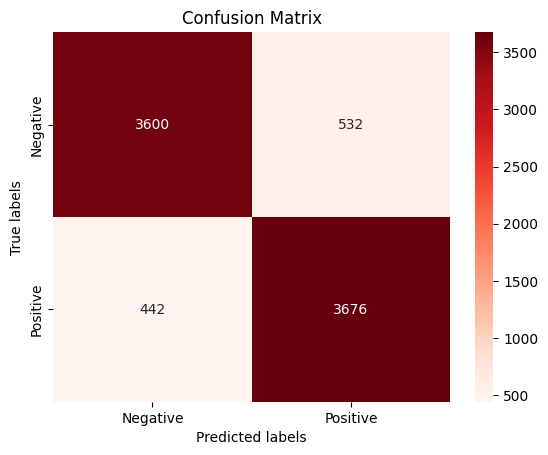

In [ ]:
# Visualizing the confision matrix 
predictions=svc_model.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
ax= plt.subplot()
cm=confusion_matrix(y_test,predictions)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  


# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

### **Akurasi**

In [ ]:
# Menghitung skor akurasi
accuracy = accuracy_score(y_test, predictions)

# Menampilkan skor akurasi
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 0.8819393939393939


In [ ]:
# Menghitung skor akurasi
accuracy = accuracy_score(y_test, predictions)

# Menampilkan skor akurasi
print("Linear SVC Accuracy:", accuracy)

Linear SVC Accuracy: 0.8819393939393939
